<a href="https://colab.research.google.com/github/imSita9/ML-Projects/blob/main/Health_Monitoring_using_Wearable_Devices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEALTH MONITORING WITH PREDICTIVE ANALYTICS USING WEARABLE DEVICES AND RANDOM FOREST ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor  # Use appropriate model
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Load the dataset
df = pd.read_csv("/content/aw_fb_data.csv")  # Change file if needed

# ✅ Display dataset info
print(df.info())
print(df.describe())

# ✅ Handle missing values (if any)
df = df.dropna()  # Remove missing values

# ✅ Convert categorical data to numerical
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


In [ ]:
# ✅ Define features (X) and target (y)
X = df.drop(columns=["activity"])  # Features
y = df["activity"]  # Target variable

# ✅ Check the data
print(X.head())
print(y.head())


   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [ ]:

# ✅ Split into train & test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# ✅ Normalize data (optional, useful for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# ✅ Train the model (Using Random Forest as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# ✅ Predict on test data
y_pred = model.predict(X_test)



In [ ]:
# ✅ Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error (MSE): 0.8232628890662409
R-Squared Score: 0.7232877433780074


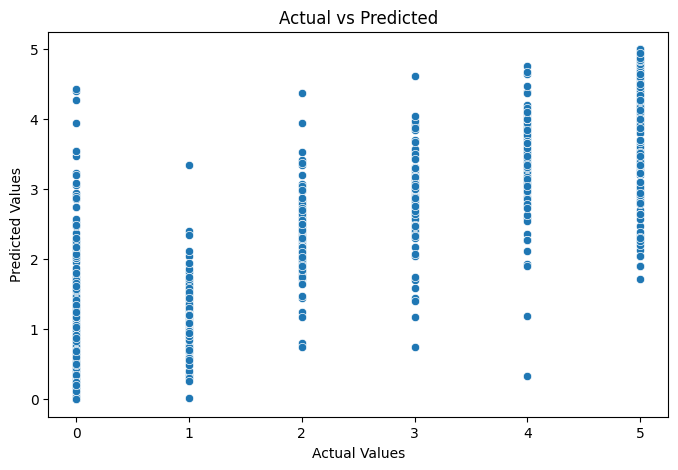

In [ ]:


# ✅ Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()



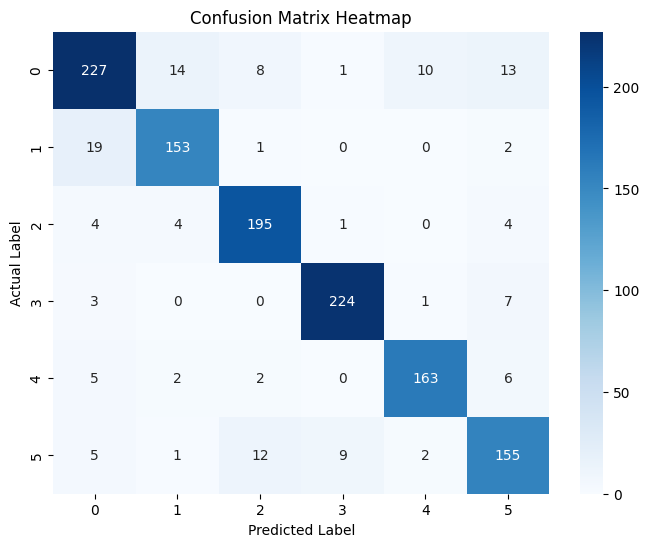

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # ✅ Use Classifier instead of Regressor

# ✅ Train the model using a classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Predict class labels instead of continuous values
y_pred = model.predict(X_test)

# ✅ Compute confusion matrix (No more errors!)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Display confusion matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


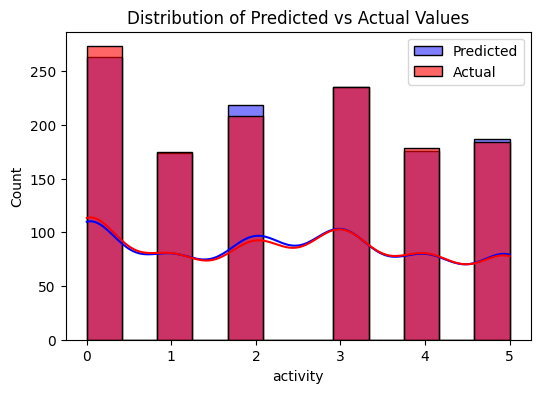

In [ ]:
# ✅ Additional Graphs 📈📉
# Distribution of predicted labels
plt.figure(figsize=(6, 4))
sns.histplot(y_pred, kde=True, color="blue", label="Predicted")
sns.histplot(y_test, kde=True, color="red", label="Actual", alpha=0.6)
plt.legend()
plt.title("Distribution of Predicted vs Actual Values")
plt.show()

In [ ]:
# ✅ Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       273
           1       0.88      0.87      0.88       175
           2       0.89      0.94      0.92       208
           3       0.95      0.95      0.95       235
           4       0.93      0.92      0.92       178
           5       0.83      0.84      0.84       184

    accuracy                           0.89      1253
   macro avg       0.89      0.89      0.89      1253
weighted avg       0.89      0.89      0.89      1253

Accuracy: 0.89


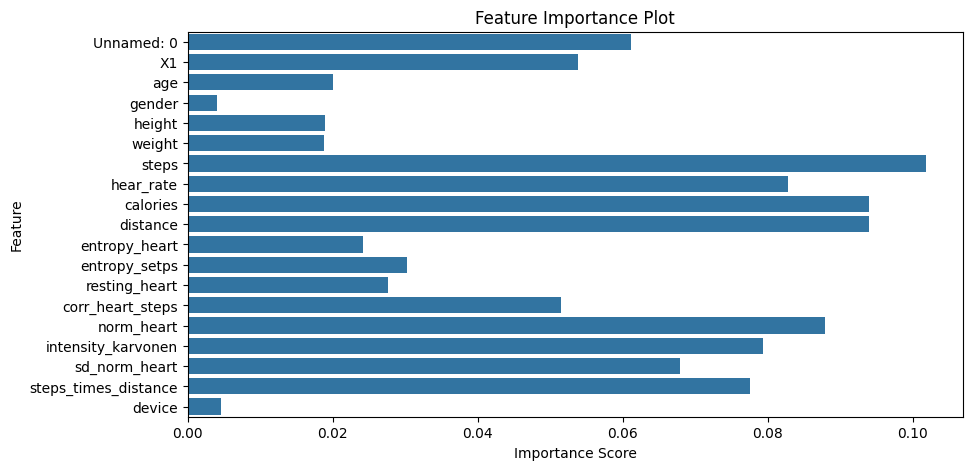

In [ ]:
# ✅ Feature Importance (if using Random Forest)
if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance, y=X.columns)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance Plot")
    plt.show()